<a href="https://colab.research.google.com/github/agsosin/COLAB/blob/main/ZAD_1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

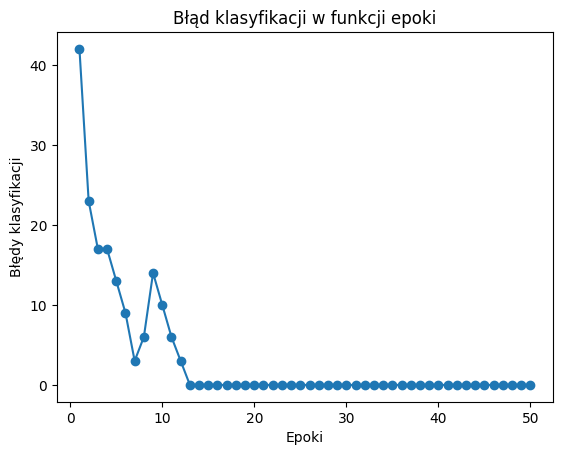

Macierz pomyłek:


array([[ 979,    1],
       [   1, 1134]])

In [2]:
# prompt: Załączony plik zawiera obrazy ręcznie narysowanych cyfr z bazy generate_mnist_csv. Obrazy zostały przekształcone do wektorów ( spłaszczone) i etykieta klasy została dodana na początek.
# Dane pobrano z repozytorium : https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/.
# Zadanie polega na wykorzystaniu perceptronu do próby rozdzielenia dwóch wybranych klas.
# 1. Wybierz dwie wybrane cyfry
# 2. Ogranicz zbiór danych do wybranych klas.
# 3. Wykorzystaj klasę perceptron do rozdzielenia tych klas ( Wykorzystaj tylko dane mnist_train.csv )
# Zwróć uwagę że zbiory nie muszą być liniowo separowalne ,czyli trzeba sensownie dobrać warunek stopu dla perceptronu .
# Perceptron powinien być zmodyfikowany przez dodanie możliwości generowania wykresu błedu w funkcji numeru epoki.
# 4. Sprawdź działanie modelu na danych mnist_test.csv (utwórz macierz pomyłek) .

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

# 1. Wybierz dwie wybrane cyfry
digit_1 = 0
digit_2 = 1

# 2. Ogranicz zbiór danych do wybranych klas
train_data = pd.read_csv('mnist_train.csv', header=None)
test_data = pd.read_csv('mnist_test.csv', header=None)

train_data = train_data[train_data[0].isin([digit_1, digit_2])]
test_data = test_data[test_data[0].isin([digit_1, digit_2])]

X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
y_train = np.where(y_train == digit_1, -1, 1)  # Ustaw etykiety na -1 i 1

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values
y_test = np.where(y_test == digit_1, -1, 1)


class Perceptron:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        self.errors_ = []

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# 3. Wykorzystaj klasę perceptron do rozdzielenia tych klas
ppn = Perceptron(eta=0.1, n_iter=50) # Dostosuj parametry
ppn.fit(X_train, y_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Błędy klasyfikacji')
plt.title('Błąd klasyfikacji w funkcji epoki')
plt.show()

# 4. Sprawdź działanie modelu na danych testowych
y_pred = ppn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Macierz pomyłek:")
conf_matrix
